# Dimensionalidad: PCA, Isomap, T-sne
---

<a id="section_toc"></a> 



[Intro](#section_intro)

[PCA para descubrir variables latentes](#section_latentes)

[PCA para reducir ruido](#section_ruido)

[PCA para visualizar datos de alta dimensionalidad](#visualizar_datos)

[Cuando PCA se queda corto](#no_lineal)


<a id="section_intro"></a> 
# Intro

[volver a TOC](#section_toc)
    
El análisis de componentes principales (PCA) es una de las técnicas más famosas para la reducción de dimensiones, extracción de características y visualización de datos. 

PCA se define por la transformación de un espacio vectorial de alta dimensión en un espacio de baja dimensión. 

Consideremos la visualización de datos de 10 dimensiones, no es posible mostrar efectivamente la forma de una distribución de datos de una dimensionalidad tan alta. PCA proporciona una forma eficiente de reducir la dimensionalidad (es decir, de 10 a 2) permitiendo visualizar la forma de la distribución de datos. 

PCA también es útil en modelos de clasificación robustos donde se proporciona un número considerablemente pequeño de datos de entrenamiento de alta dimensión. Al reducir las dimensiones de los conjuntos de datos de aprendizaje, PCA proporciona un método eficaz y eficiente para la descripción y clasificación de datos.
    
En resumen, PCA tiene una variedad de aplicaciones:
1. Reducción de la dimensionalidad
2. Visualización
3. Eliminación el ruido
4. Generación nuevos features en el dataset

**Feature extraction**

Supongamos que tenemos diez variables independientes. En la extracción de características, creamos diez variables independientes "nuevas", donde cada variable independiente "nueva" es una combinación de cada una de las diez variables independientes "antiguas". 
Creamos estas nuevas variables independientes de una manera específica y ordenamos estas nuevas variables según cuán bien representan los datos originales.

¿Dónde entra en juego la reducción de dimensionalidad? 

Mantenemos tantas variables independientes nuevas como queramos, pero eliminamos las "menos importantes". 

Debido a que ordenamos las nuevas variables según cuán bien representan los datos originales, sabemos qué variable es la más importante y la menos importante. Pero, y aquí está el truco, debido a que estas nuevas variables independientes son combinaciones de las anteriores, aún conservamos las partes más valiosas de nuestras antiguas variables, ¡incluso cuando eliminamos una o más de estas "nuevas" variables!

El análisis de componentes principales es una técnica para la extracción de características, por lo que combina nuestras variables de entrada de una manera específica, ¡entonces podemos descartar las variables "menos importantes" mientras conservamos las partes más valiosas de todas las variables! 

Como beneficio adicional, cada una de las "nuevas" variables después de PCA son **independientes** entre sí. Esto es un beneficio porque los supuestos de un modelo lineal requieren que nuestras variables explicativas sean independientes entre sí. Si decidimos ajustar un modelo de regresión lineal con estas "nuevas" variables, este supuesto necesariamente se cumplirá.

**¿Cuándo debemos usar PCA?**

* ¿Deseamos reducir el número de variables, pero no podemos identificar qué variables no son explicativas?

* ¿Deseamos asegurar que las variables sean independientes entre sí?

* ¿Estamos cómodos haciendo que las variables independientes sean menos interpretables?

Si la respuesta es "sí" a las tres preguntas, entonces PCA es un buen método. Si la respuesta a la pregunta 3 es "no", no debemos usar PCA.

#### Loadings y scores

PCA se basa en la descomposición de una matriz de features X en dos matrices V y U:

<img src='img/hl_pca_matmult.png' align='left'/>

Las dos matrices V y U son ortogonales. 

La matiz V se llama **loadings**, y la matriz U se llama **scores**. 

Los loadings pueden pensarse como el peso de cada variable original para cada componente principal. 

La matriz U tiene los datos originales representados en el sistema de coordenadas definido por las componentes principales (un sistema de coordenadas rotado).

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

<a id="section_latentes"></a> 
# PCA para descubrir variables latentes

[volver a TOC](#section_toc)


Vamos ver un ejemplo presentado en *An Introduction to Statistical Learning - with Applications in R* de Gareth James, Daniela Witten, Trevor Hastie y Robert Tibshirani.

En este ejemplo vamos a ver datos de arrestos en ciudades de USA.

In [3]:
df = pd.read_csv('../Data/USArrests.csv', index_col=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Normalizamos los datos utilizando StandardScaler:

In [5]:
std_sclr = StandardScaler()
df_std = pd.DataFrame(std_sclr.fit_transform(df), index=df.index, columns=df.columns)

Instanciamos un objeto de la clase PCA. Al no especificar en el argumento el número de componentes, PCA va a conservar todos los CP.

Calculamos las componentes principales con el método `fit` sobre los datos normalizados


In [7]:
from sklearn.decomposition import PCA
pca_arrests = PCA()
pca_arrests.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Creamos un DataFrame con los loadings.

Recordemos que los loadings representan el peso de cada variable original para cada componente principal

En este caso podemos ver que:

* la variable Assault es la que más contribuye a la pimera componenete principal

* la variable UrbanPop es la  que más contribuye a la segunda componenete principal

Miramos el valor absoluto (módulo) del loading para decidir cuál es el que más contribuye.

In [13]:
pca_loadings = pd.DataFrame(pca_arrests.components_.T, index=df.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


>  **Que es esta matriz?**

Recordemos que un 

* conjunto de vectores es ortonormal, si es un conjunto ortogonal y la norma de cada uno de sus vectores es igual a 1.

* dos vectores son ortogonales si su producto interno da 0.

Verificamos la ortonormalidad de los componentes principales:

In [14]:
pca_loadings.T.dot(pca_loadings)

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,1.040834e-16,-5.551115e-17,2.220446e-16
PC2,1.040834e-16,1.000000e+00,-5.551115e-17,8.326673e-17
PC3,-5.551115e-17,-5.551115e-17,1.000000e+00,3.330669e-16
PC4,2.220446e-16,8.326673e-17,3.330669e-16,1.000000e+00


>  **Que me garantiza esta ortonormalidad?**

Escribimos los datos originales normalizados en el **sistema de coordenadas** del espacio generado por las componenentes principales

In [11]:
df_pca = pd.DataFrame(pca_arrests.fit_transform(df_std), columns=['PC1', 'PC2', 'PC3', 'PC4'],\
                      index=df_std.index)
df_pca.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


Vamos a usar como features de nuestro conjunto de datos sólo dos variables: PC1 y PC2.

Y representamos cada registro del dataset original usando como coordena x el valor de PC1 y como coordenada y el valor de PC2
        

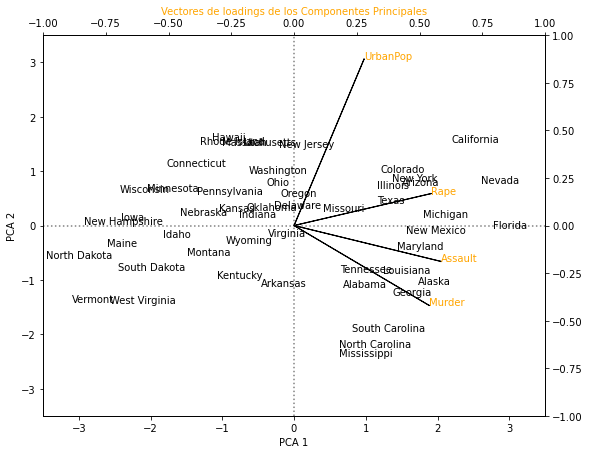

In [16]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Ploteamos a los Estados en el espacio de los Componentes Principales 1 y 2
for i in df_pca.index:
    ax1.annotate(i, (df_pca.PC1.loc[i], -df_pca.PC2.loc[i]), ha='center')

# Ploteamos las líneas de referencia
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
    
# Creamos ejes secundarios
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i], -pca_loadings.PC2.loc[i]), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], -pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], -pca_loadings.PC2[1])
ax2.arrow(0,0,pca_loadings.PC1[2], -pca_loadings.PC2[2])
ax2.arrow(0,0,pca_loadings.PC1[3], -pca_loadings.PC2[3]);

De esta forma podemos ver gráficamente la relación entre las variables originales y los primeros 2 componentes principales.




### Veamos el ratio la varianza explicada por cada componente principal

In [19]:
pca_arrests.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

Vemos que

* la primera componente principal explica el 62% de la varianza de los datos

* la segunda componente principal explica el 25% de la varianza de los datos

* la tercera componente principal explica el 9% de la varianza de los datos

* la cuarta componente principal explica el 4% de la varianza de los datos

Graficamos el porcentaje de varianza explicada en función de la cantidad de componentes

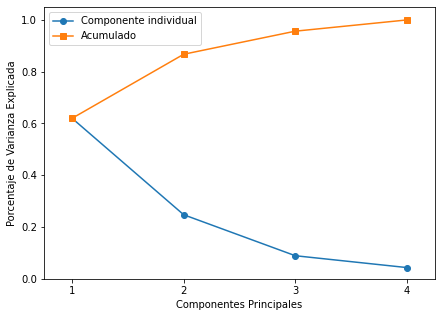

In [15]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca_arrests.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot([1,2,3,4], np.cumsum(pca_arrests.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

En este gráfico podemos observar que usando sólo dos features (PC1 y PC2) explicamos más del 80% de la varianza del conjunto original

<a id="section_ruido"></a> 
# PCA para reducir ruido

[volver a TOC](#section_toc)


PCA puede ser usado también como "filtro de ruido". La intuición es la siguiente: cada componente con varianza mucho más grande que el ruido debería verse relativamente poco o nada afectado por dicho ruido. Entonces, si reconstruimos los datos usando solamente los componentes de mayor varianza, debería ser posible conservar la mayor parte de la señal y descartar la mayor parte del ruido.


### Los datos

Vamos a usar en este ejemplo el dataset digits que provee `sklearn.datasets`

El dataset de dígitos consiste en imagenes de 8x8 píxeles de dígitos del 0 al 9 escritos a mano.

In [20]:
digits = load_digits()
digits.data.shape

(1797, 64)

Definimos una función para plotear los dígitos

In [21]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

Ejecutamos la función con los datos de dígitos

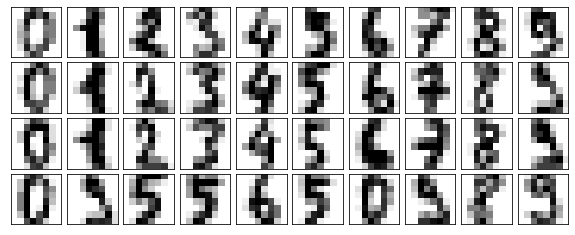

In [22]:
plot_digits(digits.data)

Vamos a introducir ruido en esto datos sumando errores aleatorios que se distribuyen normal con media 0 y desvío 4.

Y veamos cómo quedan los datos con ruido.

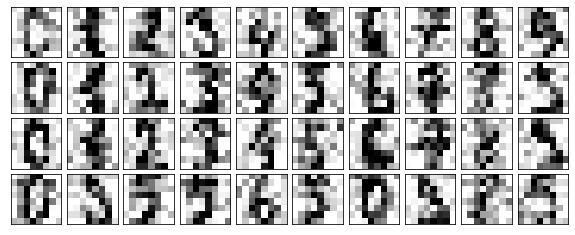

In [23]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [25]:
digits.data.shape

(1797, 64)

#### PCA


Vamos instanciar un objeto PCA que explique el 50% de la varianza.

La cantidad de componenetes necesaria para explicar el 50% de la varianza resultó ser 12, mientras que el dataset original tiene 64 features

In [26]:
pca_digits = PCA(0.50)
pca = pca_digits.fit(noisy)
pca.n_components_

12

Calculemos los componentes del dataset con ruido

In [27]:
components = pca.transform(noisy)
components.shape

(1797, 12)

Apliquemos ahora la transformación inversa, que a partir de los componentes reconstruya los valores de las x originales.

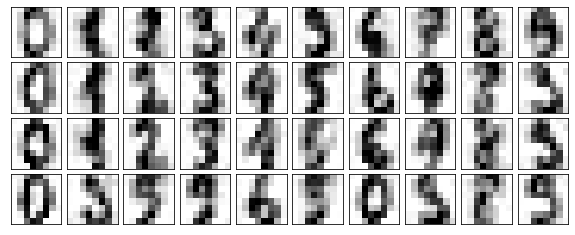

In [28]:
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Aunque el dataset resultado tiene menos definición que el original, vemos que el ruido fue eliminado.

Observemos también que en esta visualización tenemos imágenes representadas con 12 features en lugar de las 64 que definian el datatset original. Es decir, descartamos 52 componentes de nuestro dataset.

<a id="visualizar_datos"></a> 

## PCA para visualizar datos

Vamos a proyectar los datos del dataset de digitos en las primeras dos componenetes principales, y vamos a usar esta proyección para visualizar los datos


In [29]:
pca_digits_vis = PCA(n_components=2)
projected = pca_digits_vis.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


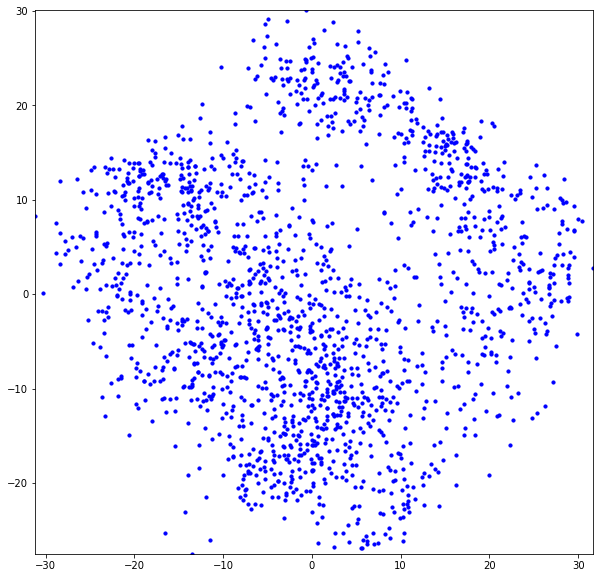

In [33]:
plt.figure(figsize=(10,10))
plt.xlim(projected[:,0].min(), projected[:,0].max())
plt.ylim(projected[:,1].min(), projected[:,1].max())

for i in range(len(projected)):
    plt.scatter(projected[i,0], projected[i,1], color='b', s=10)

Definimos una función para plotear los dígitos en 2 dimensiones generados por PCA

In [30]:
def plot_digits_pca(projection, numbers):
    
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
    plt.figure(figsize=(10,10))
    plt.xlim(projection[:,0].min(), projection[:,0].max())
    plt.ylim(projection[:,1].min(), projection[:,1].max())

    for i in range(len(projection)):
        plt.text(projection[i,0], projection[i,1], str(numbers[i]),
                color=colors[numbers[i]], fontdict={'weight':'bold', 'size':9})
        plt.xlabel('Primer Componente Principal')
        plt.ylabel('Segundo Componente Principal')

Ploteamos los dígitos proyectados con PCA

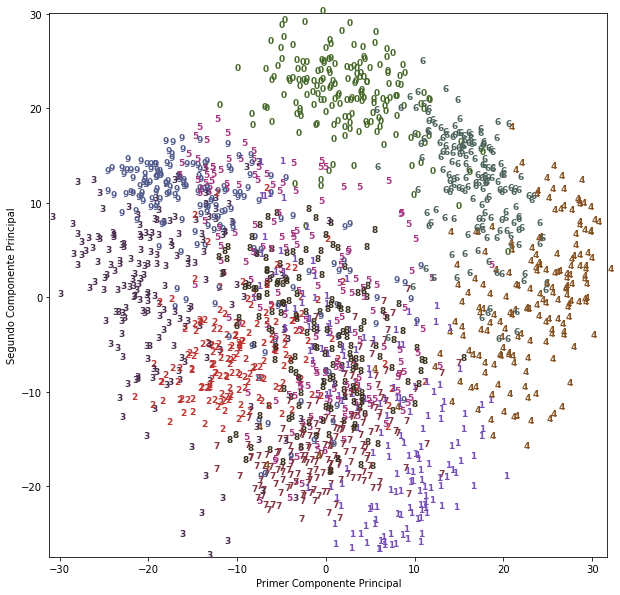

In [31]:
plot_digits_pca(projected, digits.target)

Vemos que PCA logró encontrar alguna estructura en los datos pero no llegó a separar bien a la mayoría de los números. Por ejemplo, el segundo componente parece distinguir bien entre 0 y 1. 

Un punto importante a remarcar es que estamos ploteando usando las etiquetas de los registros. Es decir, tenemos más información que la que tendríamos en un problema típico de aprendizaje no supervisado. 

Veamos cuál sería el resultado del ploteo sin las etiquetas:

Podemos intuir algún tipo de estructura o separación entre grupos, pero evidentemente los datos son demasiado complejos y no lineales para que PCA pueda capturar correctamente la estructura y separarlos en grupos distintos (acorde a su etiqueta).

## Referencias

* User guide https://scikit-learn.org/stable/modules/decomposition.html#pca

* Documentación https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

* Principal Component Analysis Explained Visually https://setosa.io/ev/principal-component-analysis/

* http://www.statistics4u.info/fundstat_eng/cc_pca_loadscore.html

* Python Data Science Handbook, Jake VanderPlas https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [52]:
def plot_digits_manifold(projection, numbers):
    
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
    plt.figure(figsize=(10,10))
    plt.xlim(projection[:,0].min(), projection[:,0].max())
    plt.ylim(projection[:,1].min(), projection[:,1].max())

    for i in range(len(projection)):
        plt.text(projection[i,0], projection[i,1], str(numbers[i]),
                color=colors[numbers[i]], fontdict={'weight':'bold', 'size':9})
        plt.xlabel('Dimensión 1')
        plt.ylabel('Dimensión 2')
        
def plot_digits_manifold_no_labels(projection):      
    plt.figure(figsize=(10,10))
    plt.xlim(projection[:,0].min(), projection[:,0].max())
    plt.ylim(projection[:,1].min(), projection[:,1].max())

    for i in range(len(projection)):
        plt.scatter(projection[i,0], projection[i,1], color='b', s=10)        

        
def plot_digits_manifold_no_labels(projection):      
    plt.figure(figsize=(10,10))
    plt.xlim(projection[:,0].min(), projection[:,0].max())
    plt.ylim(projection[:,1].min(), projection[:,1].max())
    for i in range(len(projection)):
        plt.scatter(projection[i,0], projection[i,1], color='b', s=10)                

In [62]:
def compare_manifolds(projections):      
    fig, axs = plt.subplots(1, len(projections),figsize=(20,10))
    
    fig.suptitle('Comparando proyecciones')
    for i,ax in enumerate(axs):
        ax.axis(xmin=projections[i][:,0].min(),xmax=projections[i][:,0].max(), ymin=projections[i][:,1].min(), ymax=projections[i][:,1].max())
        for j in range(len(projections[i])):
            ax.scatter(projections[i][j,0], projections[i][j,1], color='b', s=10)              

## Manifold Learning como reducción de la dimensionalidad


Dado un set de datos en un espacio multidimensional busca una representación de menor dimensionalidad que preserve ciertas relaciones dentro de los datos.
Son una familia de estimadores no supervisados.


La noción de "cercanía" se refina utilizando la distribución de los datos. Hay algunos frameworks donde esto se logra con:

* Punto de vista probabilístico: la densidad acorta las distancias


* Punto de vista manifold: la distancia debe medirse "a lo largo" de los manifold

In [359]:
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

<a id="no_lineal"></a> 

# Mas alla de la linealidad

In [366]:
from sklearn.datasets import make_circles
n_samples = 150
X,y = make_circles(n_samples=n_samples, factor=0.5,       noise=.05)

In [367]:
X.shape

(150, 2)

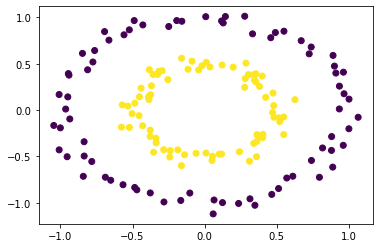

In [368]:
plt.scatter(X[:,0],X[:,1], c=y)

In [369]:
pca_g = PCA(1)
proy_g=pca_g.fit_transform(X)

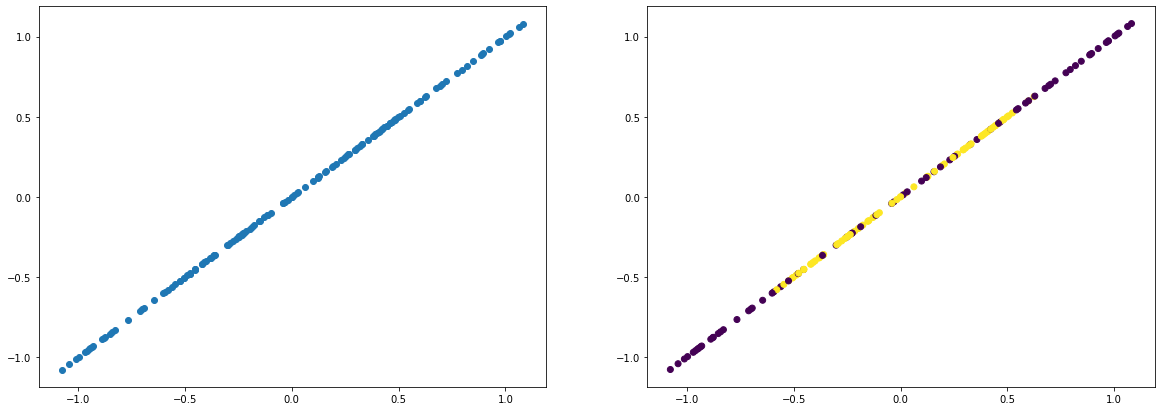

In [370]:
fig0, axs0 = plt.subplots(1, 2,figsize=(20,7))
axs0[0].scatter(proy_g,proy_g)     
axs0[1].scatter(proy_g,proy_g,c=y)

In [371]:
isomap = Isomap(n_neighbors=6, n_components=1)
iso_g = isomap.fit_transform(X)

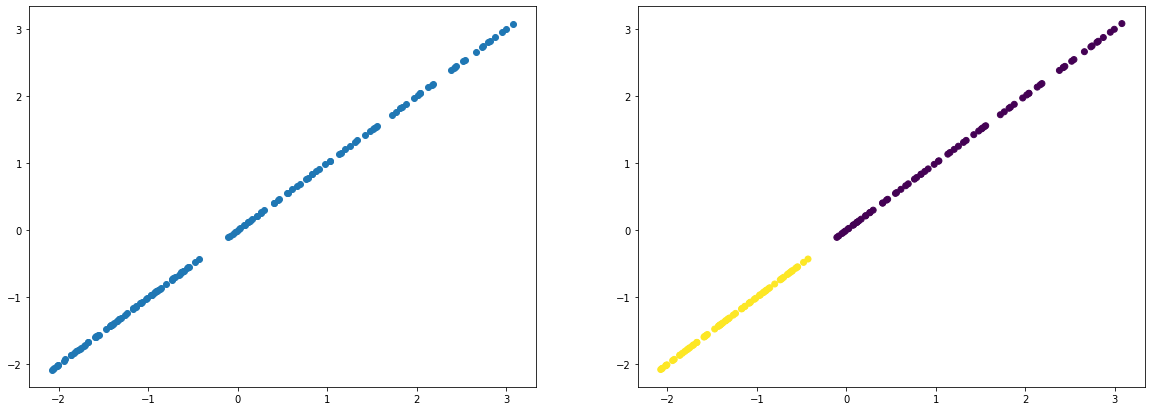

In [372]:
fig1, axs1 = plt.subplots(1, 2,figsize=(20,7))
axs1[0].scatter(iso_g,iso_g)   
axs1[1].scatter(iso_g,iso_g,c=y)


In [373]:
tsne = TSNE(n_components=1, random_state=42)
tsne_g = tsne.fit_transform(X)

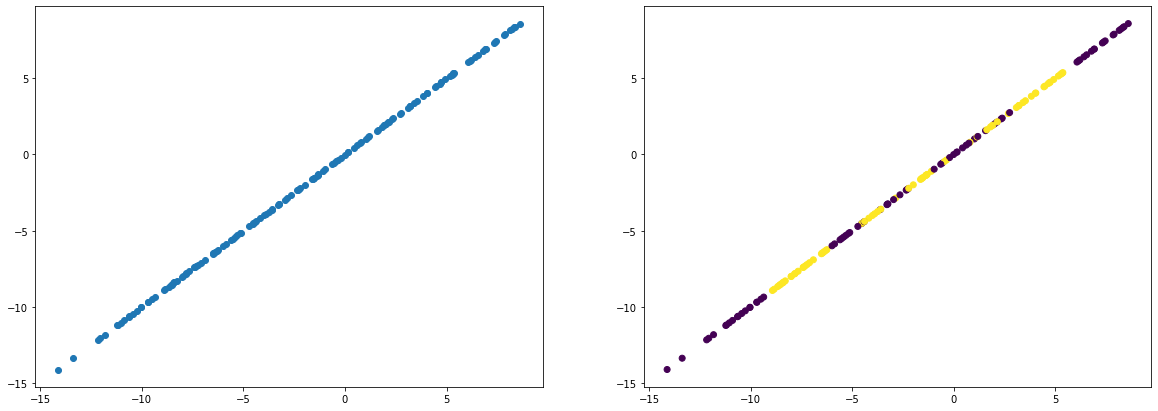

In [374]:
fig2, axs2 = plt.subplots(1, 2,figsize=(20,7))
axs2[0].scatter(tsne_g,tsne_g)   
axs2[1].scatter(tsne_g,tsne_g,c=y)

### Mirando la distribucion

In [422]:
from sklearn.datasets import make_blobs
n_samples = 150
X,y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1,centers=3)

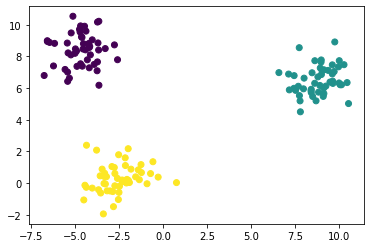

In [423]:
plt.scatter(X[:,0],X[:,1],c=y)

In [424]:
pca_g = PCA(1)
proy_g=pca_g.fit_transform(X)

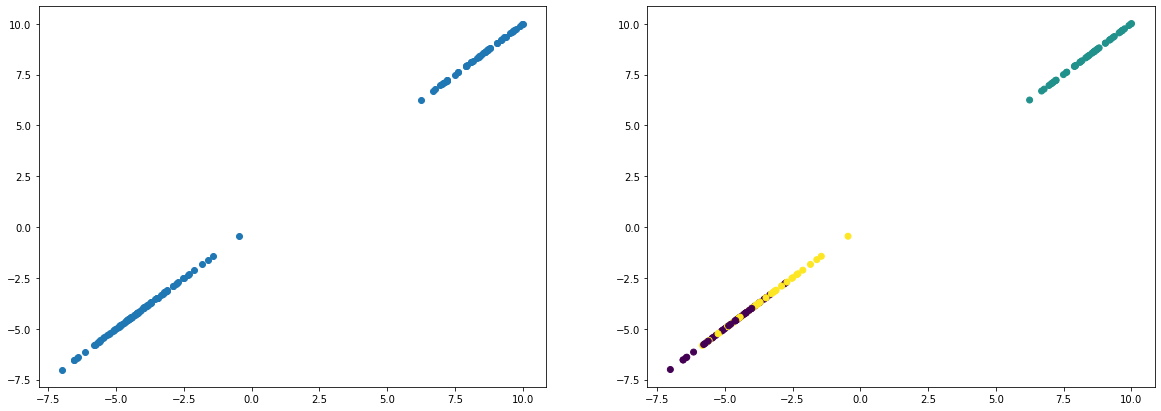

In [425]:
fig0, axs0 = plt.subplots(1, 2,figsize=(20,7))
axs0[0].scatter(proy_g,proy_g)     
axs0[1].scatter(proy_g,proy_g,c=y)

In [426]:
isomap = Isomap(n_neighbors=6, n_components=1)
iso_g = isomap.fit_transform(X)

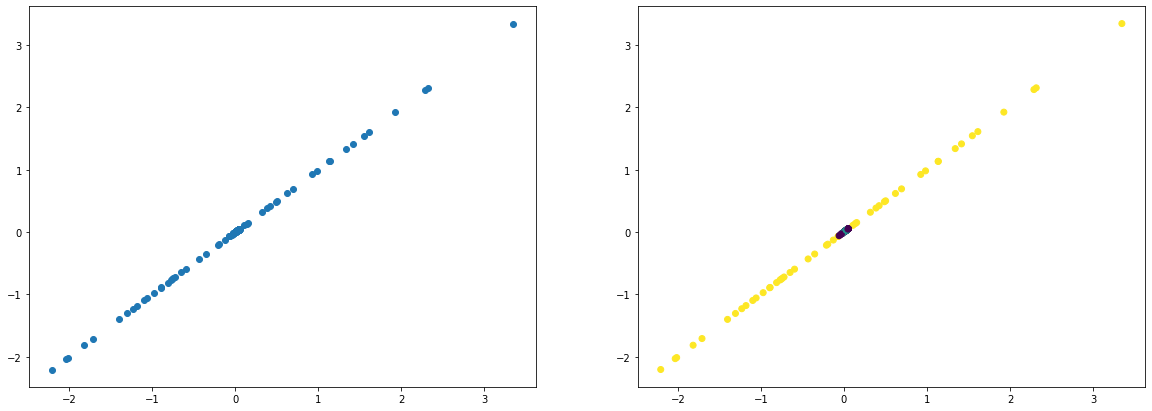

In [427]:
fig1, axs1 = plt.subplots(1, 2,figsize=(20,7))
axs1[0].scatter(iso_g,iso_g)   
axs1[1].scatter(iso_g,iso_g,c=y)

In [428]:
tsne = TSNE(n_components=1, random_state=42)
tsne_g = tsne.fit_transform(X)

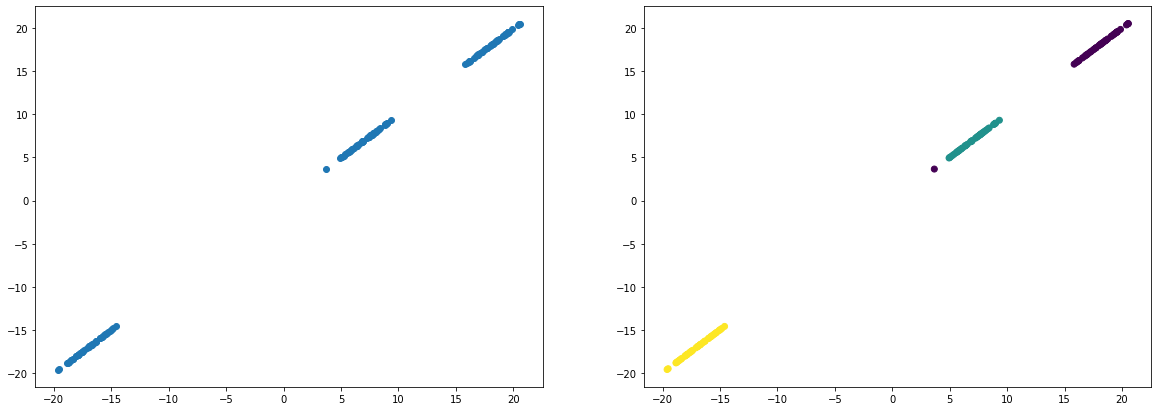

In [429]:
fig2, axs2 = plt.subplots(1, 2,figsize=(20,7))
axs2[0].scatter(tsne_g,tsne_g)   
axs2[1].scatter(tsne_g,tsne_g,c=y)

Definimos dos funciones:
* una función para plotear los dígitos en 2 dimensiones generados por Manifold con su etiqueta asociada
* una función para plotear los dígitos en 2 dimensiones generados por Manifold sin etiquetas

### Comparando isomap y tsne:

https://scikit-learn.org/0.18/auto_examples/manifold/plot_compare_methods.html

![](https://scikit-learn.org/0.18/_images/sphx_glr_plot_compare_methods_001.png)

![](https://thegreedychoice.github.io/assets/images/machine-learning/ISOMAP-SwissRoll.png)

![](https://thegreedychoice.github.io/assets/images/machine-learning/geodesic.png)


![](https://s3-us-west-2.amazonaws.com/articles-dimred/isomap/isomap_explain.png)

<a id="section_isomap"></a> 
## Isomap



https://scikit-learn.org/stable/modules/manifold.html#isomap

Instanciamos y fiteamos isomap

Volvamos a los digitos

In [36]:
isomap = Isomap(n_neighbors=7, n_components=2)
digits_iso = isomap.fit_transform(digits.data)

Ploteamos los dígitos proyectados con Isomap

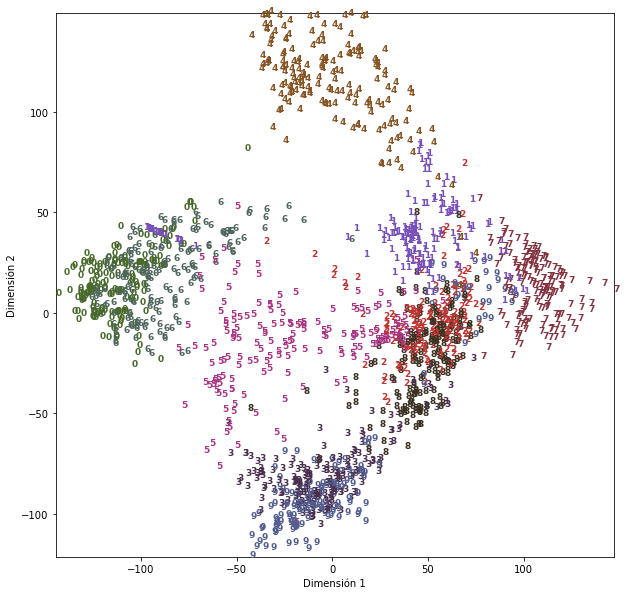

In [37]:
plot_digits_manifold(digits_iso, digits.target)

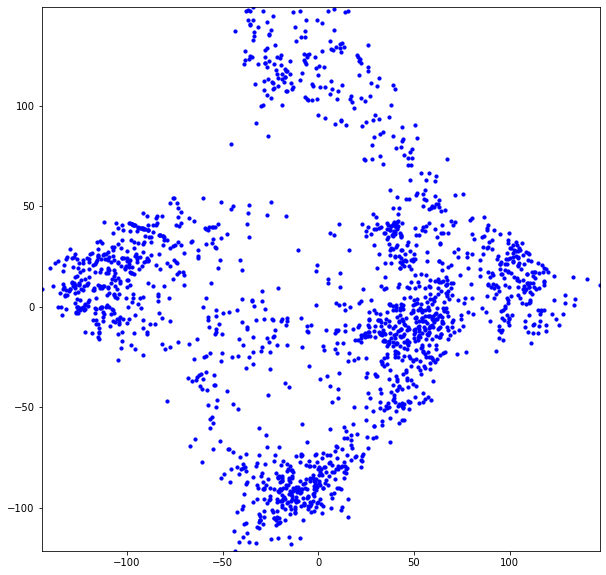

In [38]:
plot_digits_manifold_no_labels(digits_iso)

<a id="section_tsne"></a> 
## T-SNE





>“t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding”.

https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne


Instanciamos y fiteamos T-SNE

In [39]:
tsne = TSNE(n_components=2, random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

Ploteamos los dígitos proyectados con T-SNE

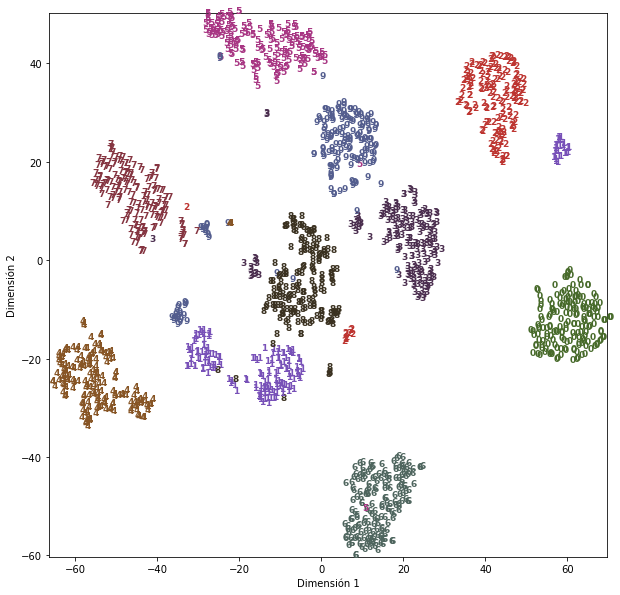

In [40]:
plot_digits_manifold(digits_tsne, digits.target)

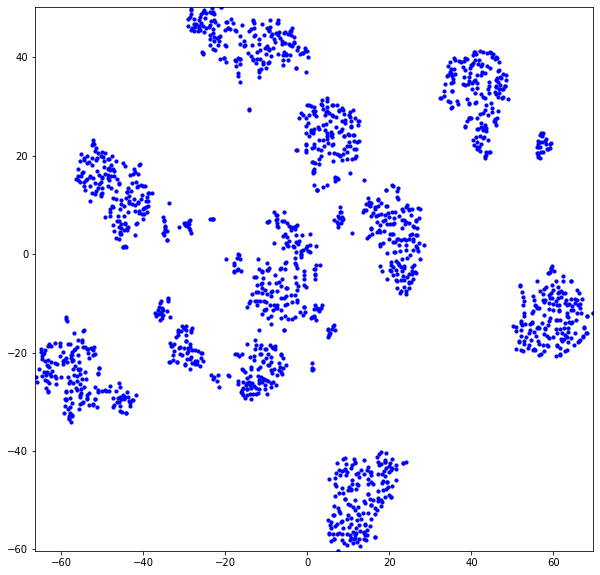

In [41]:
plot_digits_manifold_no_labels(digits_tsne)

Vemos que T-SNE logra capturar mejor la estructura de los datos y separar mejor los diferentes dígitos al proyectar en 2 dimensiones.

Y tanto T-SNE como Isomap separan mejor los grupos que PCA

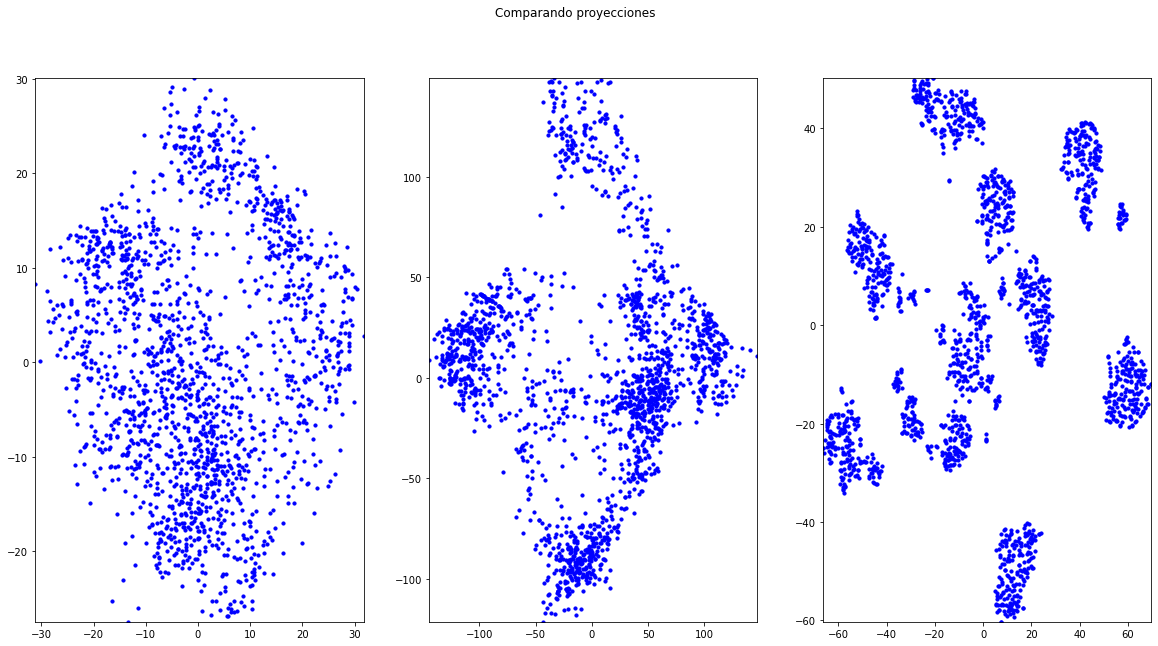

In [63]:
compare_manifolds([projected,digits_iso,digits_tsne])

* Para datasets de alta dimensionalidad de problemas reales se recomienda usar Isomap que produce embeddings más significativos.

* Para datasets muy clusterizados, t-SNE tiende a funcionar bien pero puede resultar lento respecto a otros métodos.


En cuanto a las desventajas del t-SNE, pueden destacarse:

* Está diseñado para reducir los datos a 2 o 3 dimensiones. No debe aplicarse si la reducción de dimensionalidad se hace a espacios d > 3.

* La baja interpretación de su algoritmo (black box), es decir, permite visualizar muy bien datos, pero no genera, por ejemplo, una serie de ecuaciones fácilmente interpretables como hace el PCA.

* No es un proceso totalmente determinista, por lo que, a pesar de emplear los mismos datos, los resultados pueden variar.

* Su algoritmo no es incremental, en otras palabras, no puede aplicarse sobre un set de datos y después actualizarlo con unas pocas observaciones nuevas. Se tiene que ejecutar de nuevo todo el algoritmo incluyendo todas las observaciones (las viejas y las nuevas).


## Referencias

https://medium.com/@jrodthoughts/the-art-of-simplification-manifold-learning-dfc885fb74e3

https://towardsdatascience.com/manifold-learning-the-theory-behind-it-c34299748fec

https://scikit-learn.org/stable/modules/manifold.html
